In [102]:
import polars as pl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

FILE_PATH = "../csv_files/processed_small_dataset.csv"

In [103]:
df = pl.read_csv(FILE_PATH)
#df = df.drop_nulls(subset=["genres_all"])
df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food"""
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway"""
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[]""","""Spiritual Level"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [104]:
genre_mapping = {
    1: 'Avant-Garde',
    2: 'International',
    3: 'Blues',
    4: 'Jazz',
    5: 'Classical',
    6: 'Novelty',
    7: 'Comedy',
    8: 'Old-Time / Historic',
    9: 'Country',
    10: 'Pop',
    11: 'Disco',
    12: 'Rock',
    13: 'Easy Listening',
    14: 'Soul-RnB',
    15: 'Electronic',
    16: 'Sound Effects',
    17: 'Folk',
    18: 'Soundtrack',
    19: 'Funk',
    20: 'Spoken',
    21: 'Hip-Hop',
    22: 'Audio Collage',
    25: 'Punk',
    26: 'Post-Rock',
    27: 'Lo-Fi',
    30: 'Field Recordings',
    31: 'Metal',
    32: 'Noise',
    33: 'Psych-Folk',
    36: 'Krautrock',
    37: 'Jazz: Vocal',
    38: 'Experimental',
    41: 'Electroacoustic',
    42: 'Ambient Electronic',
    43: 'Radio Art',
    45: 'Loud-Rock',
    46: 'Latin America',
    47: 'Drone',
    49: 'Free-Folk',
    53: 'Noise-Rock',
    58: 'Psych-Rock',
    63: 'Bluegrass',
    64: 'Electro-Punk',
    65: 'Radio',
    66: 'Indie-Rock',
    70: 'Industrial',
    71: 'No Wave',
    74: 'Free-Jazz',
    76: 'Experimental Pop',
    77: 'French',
    79: 'Reggae - Dub',
    81: 'Afrobeat',
    83: 'Nerdcore',
    85: 'Garage',
    86: 'Indian',
    88: 'New Wave',
    89: 'Post-Punk',
    90: 'Sludge',
    92: 'African',
    94: 'Freak-Folk',
    97: 'Jazz: Out',
    98: 'Progressive',
    100: 'Alternative Hip-Hop',
    101: 'Death-Metal',
    102: 'Middle East',
    103: 'Singer-Songwriter',
    107: 'Ambient',
    109: 'Hardcore',
    111: 'Power-Pop',
    113: 'Space-Rock',
    117: 'Polka',
    118: 'Balkan',
    125: 'Unclassifiable',
    130: 'Europe',
    137: 'Americana',
    138: 'Spoken Weird',
    166: 'Interview',
    167: 'Black-Metal',
    169: 'Rockabilly',
    170: 'Easy Listening: Vocal',
    171: 'Brazilian',
    172: 'Asia-Far East',
    173: 'N. Indian Traditional',
    174: 'South Indian Traditional',
    175: 'Bollywood',
    176: 'Pacific',
    177: 'Celtic',
    178: 'Be-Bop',
    179: 'Big Band/Swing',
    180: 'British Folk',
    181: 'Techno',
    182: 'House',
    183: 'Glitch',
    184: 'Minimal Electronic',
    185: 'Breakcore - Hard',
    186: 'Sound Poetry',
    187: '20th Century Classical',
    188: 'Poetry',
    189: 'Talk Radio',
    214: 'North African',
    224: 'Sound Collage',
    232: 'Flamenco',
    236: 'IDM',
    240: 'Chiptune',
    247: 'Musique Concrete',
    250: 'Improv',
    267: 'New Age',
    286: 'Trip-Hop',
    296: 'Dance',
    297: 'Chip Music',
    311: 'Lounge',
    314: 'Goth',
    322: 'Composed Music',
    337: 'Drum & Bass',
    359: 'Shoegaze',
    360: 'Kid-Friendly',
    361: 'Thrash',
    362: 'Synth Pop',
    374: 'Banter',
    377: 'Deep Funk',
    378: 'Spoken Word',
    400: 'Chill-out',
    401: 'Bigbeat',
    404: 'Surf',
    428: 'Radio Theater',
    439: 'Grindcore',
    440: 'Rock Opera',
    441: 'Opera',
    442: 'Chamber Music',
    443: 'Choral Music',
    444: 'Symphony',
    456: 'Minimalism',
    465: 'Musical Theater',
    468: 'Dubstep',
    491: 'Skweee',
    493: 'Western Swing',
    495: 'Downtempo',
    502: 'Cumbia',
    504: 'Latin',
    514: 'Sound Art',
    524: 'Romany (Gypsy)',
    538: 'Compilation',
    539: 'Rap',
    542: 'Breakbeat',
    567: 'Gospel',
    580: 'Abstract Hip-Hop',
    602: 'Reggae - Dancehall',
    619: 'Spanish',
    651: 'Country & Western',
    659: 'Contemporary Classical',
    693: 'Wonky',
    695: 'Jungle',
    741: 'Klezmer',
    763: 'Holiday',
    806: 'hiphop',
    808: 'Salsa',
    810: 'Nu-Jazz',
    811: 'Hip-Hop Beats',
    906: 'Modern Jazz',
    1032: 'Turkish',
    1060: 'Tango',
    1156: 'Fado',
    1193: 'Christmas',
    1235: 'Instrumental'
}

In [105]:
parent_genre_mapping = {2: 'International', 3: 'Blues', 4: 'Jazz', 5: 'Classical', 8: 'Old-Time / Historic', 9: 'Country', 10: 'Pop', 12: 'Rock', 14: 'Soul-RnB', 15: 'Electronic', 17: 'Folk', 20: 'Spoken', 21: 'Hip-Hop', 38: 'Experimental', 1235: 'Instrumental'}

In [106]:
parsed_df = df.with_columns([
  pl.col("genres")
    .str.strip_chars('[]" ')
    .str.split(",")
    .alias("parsed_genres_list")
  ]
)
parsed_df

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,list[str]
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","[""21""]"
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""","[""21""]"
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","[""21""]"
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","[""10""]"
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[

In [107]:
exploded = parsed_df.explode("parsed_genres_list")
exploded = exploded.with_columns(
    pl.col("parsed_genres_list")
    .str.strip_chars()
)
exploded

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","""21"""
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""","""21"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","""21"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","""10"""
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[]""","""Spirit

In [108]:
exploded = exploded.filter(
    pl.col("parsed_genres_list").str.strip_chars() != ""
)
exploded.with_columns(
    pl.col("parsed_genres_list")
    .cast(pl.Int16)
)

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,i16
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""",21
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""",21
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""",21
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""",10
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,978,"""en""","""Attribution-NonCommercial-NoDe…",361,null,3,null,"""[]""","""Spiritual Level""",76
…,…,…,…,

In [109]:
exploded = exploded.with_columns([
    pl.col("parsed_genres_list")
    .replace(genre_mapping)
    .alias("parsed_genres_list_names")
    ]
)
exploded

track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments_1,date_created_1,favorites_1,id_1,latitude,location,longitude,members,name,related_projects,tags_1,website,wikipedia_page,split,subset,bit_rate,comments_2,composer,date_created_2,date_recorded,duration,favorites_2,genre_top,genres,genres_all,information_1,interest,language_code,license,listens_1,lyricist,number,publisher,tags_2,title_1,parsed_genres_list,parsed_genres_list_names
i64,i64,str,str,str,i64,i64,str,i64,str,str,str,i64,str,str,str,str,str,i64,str,i64,i64,f64,str,f64,str,str,str,str,str,str,str,str,i64,i64,str,str,str,i64,i64,str,str,str,str,i64,str,str,i64,str,i64,str,str,str,str,str
2,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:12""","""2008-11-26 00:00:00""",168,2,"""Hip-Hop""","""[21]""","""[21]""",null,4656,"""en""","""Attribution-NonCommercial-Shar…",1293,null,3,null,"""[]""","""Food""","""21""","""Hip-Hop"""
3,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""medium""",256000,0,null,"""2008-11-26 01:48:14""","""2008-11-26 00:00:00""",237,1,"""Hip-Hop""","""[21]""","""[21]""",null,1470,"""en""","""Attribution-NonCommercial-Shar…",514,null,4,null,"""[]""","""Electric Ave""","""21""","""Hip-Hop"""
5,0,"""2008-11-26 01:44:45""","""2009-01-05 00:00:00""",null,4,1,"""<p></p>""",6073,null,"""[]""","""AWOL - A Way Of Life""",7,"""Album""","""2006-01-01 00:00:00""",null,null,"""<p>A Way Of Life, A Collective…",0,"""2008-11-26 01:42:32""",9,1,40.058324,"""New Jersey""",-74.405661,"""Sajje Morocco,Brownbum,ZawidaG…","""AWOL""","""The list of past projects is 2…","""['awol']""","""http://www.AzillionRecords.blo…",null,"""training""","""small""",256000,0,null,"""2008-11-26 01:48:20""","""2008-11-26 00:00:00""",206,6,"""Hip-Hop""","""[21]""","""[21]""",null,1933,"""en""","""Attribution-NonCommercial-Shar…",1151,null,6,null,"""[]""","""This World""","""21""","""Hip-Hop"""
10,0,"""2008-11-26 01:45:08""","""2008-02-06 00:00:00""",null,4,6,null,47632,null,"""[]""","""Constant Hitmaker""",2,"""Album""",null,null,"""Mexican Summer, Richie Records…","""<p><span style=""font-family:Ve…",3,"""2008-11-26 01:42:55""",74,6,null,null,null,"""Kurt Vile, the Violators""","""Kurt Vile""",null,"""['philly', 'kurt vile']""","""http://kurtvile.com""",null,"""training""","""small""",192000,0,"""Kurt Vile""","""2008-11-25 17:49:06""","""2008-11-26 00:00:00""",161,178,"""Pop""","""[10]""","""[10]""",null,54881,"""en""","""Attribution-NonCommercial-NoDe…",50135,null,1,null,"""[]""","""Freeway""","""10""","""Pop"""
20,0,"""2008-11-26 01:45:05""","""2009-01-06 00:00:00""",null,2,4,"""<p> ""spiritual songs"" from Nic…",2710,null,"""[]""","""Niris""",13,"""Album""","""1990-01-01 00:00:00""","""2011-01-01 00:00:00""",null,"""<p>Songs written by: Nicky Coo…",2,"""2008-11-26 01:42:52""",10,4,51.895927,"""Colchester England""",0.891874,"""Nicky Cook ""","""Nicky Cook""",null,"""['instrumentals', 'experimenta…",null,null,"""training""","""large""",256000,0,null,"""2008-11-26 01:48:56""","""2008-01-01 00:00:00""",311,0,null,"""[76, 103]""","""[17, 10, 76, 103]""",null,97

In [110]:
group_by_track_genre = exploded.group_by("track_id").agg(
    pl.col("parsed_genres_list_names")
)


In [111]:
flat = group_by_track_genre.explode("parsed_genres_list_names").rename({
    "parsed_genres_list_names": "genre"
})
flat

track_id,genre
i64,str
104878,"""Electronic"""
104878,"""Experimental"""
104878,"""Glitch"""
104878,"""IDM"""
113399,"""Hip-Hop"""
…,…
16113,"""Synth Pop"""
57542,"""Chip Music"""
84653,"""Experimental"""


In [112]:
# your exploded df
flat = group_by_track_genre \
    .explode("parsed_genres_list_names") \
    .rename({"parsed_genres_list_names": "genre"})

# the set of parent‐level genre names
parent_names = set(parent_genre_mapping.values())

# keep only those rows where genre is *not* in the parent list
flat_subgenres = flat.filter(
    ~pl.col("genre").is_in(parent_names)
)

flat_subgenres

track_id,genre
i64,str
104878,"""Glitch"""
104878,"""IDM"""
113399,"""Rap"""
112098,"""Glitch"""
112098,"""IDM"""
…,…
130015,"""Shoegaze"""
63410,"""Trip-Hop"""
16113,"""Disco"""


In [113]:
# keep only those rows where genre is in the parent list
flat_parent_genres = flat.filter(
    pl.col("genre").is_in(parent_names)
)

flat_parent_genres

track_id,genre
i64,str
104878,"""Electronic"""
104878,"""Experimental"""
113399,"""Hip-Hop"""
112098,"""Electronic"""
112098,"""Experimental"""
…,…
63410,"""Electronic"""
16113,"""Pop"""
84653,"""Experimental"""


In [114]:
pairs = (
    flat_subgenres
    .join(
      flat_subgenres.rename({"genre": "genre_b"}), 
      on="track_id", 
      how="inner"
    )
    .filter(pl.col("genre") < pl.col("genre_b"))
    .select(["genre", "genre_b"])
)
pairs


genre,genre_b
str,str
"""Glitch""","""IDM"""
"""Glitch""","""IDM"""
"""Breakbeat""","""Jungle"""
"""Psych-Rock""","""Space-Rock"""
"""Ambient""","""Glitch"""
…,…
"""Dance""","""Downtempo"""
"""Chill-out""","""Downtempo"""
"""Free-Jazz""","""Improv"""


In [115]:
co_occurrence = (
    pairs
    .group_by(["genre", "genre_b"])
    .len()
    .sort("len", descending=True)
)

co_occurrence

genre,genre_b,len
str,str,u32
"""Avant-Garde""","""Electroacoustic""",2555
"""Electroacoustic""","""Musique Concrete""",2183
"""Avant-Garde""","""Musique Concrete""",2049
"""Electroacoustic""","""Field Recordings""",1805
"""Avant-Garde""","""Field Recordings""",1753
…,…,…
"""Musique Concrete""","""Spoken Word""",1
"""Polka""","""Post-Rock""",1
"""Krautrock""","""Loud-Rock""",1


In [116]:
heatmap_df = co_occurrence.pivot(
    values="len", 
    index="genre", 
    on="genre_b"
)

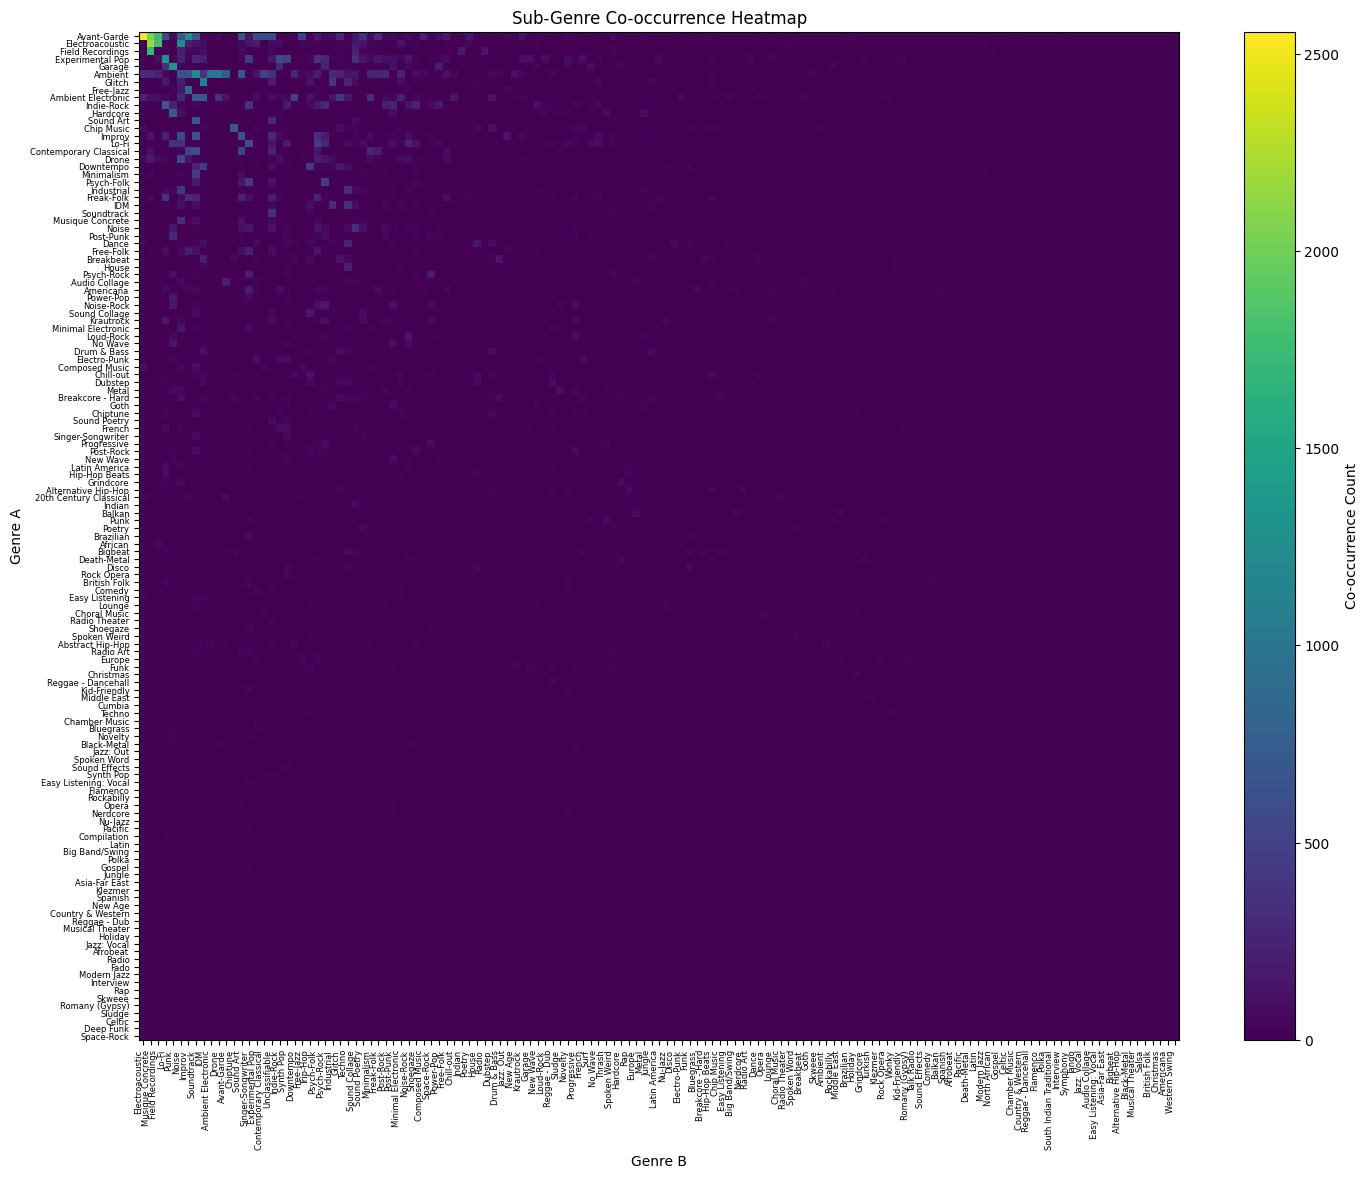

In [117]:
import numpy as np
import matplotlib.colors as mcolors


heatmap_df_filled = heatmap_df.fill_null(0)

genres = heatmap_df_filled["genre"].to_list()
labels_x = heatmap_df_filled.columns[1:]
labels_y = genres

matrix = heatmap_df_filled.select(labels_x).to_numpy()
n = len(labels_x)
# Plotting
fig, ax = plt.subplots(figsize=(20, 16))

cax = ax.imshow(matrix, aspect='auto')
#norm = mcolors.LogNorm(vmin=1, vmax=matrix.max())
#cax = ax.imshow(matrix, aspect='auto', norm=norm)
#fig.colorbar(cax, label="Co-occurrence Count (log scale)")
fig.colorbar(cax, label="Co-occurrence Count")

ax.set_xticks(np.arange(n))
ax.set_xticklabels(labels_x, rotation=90, ha='right', fontsize=6)
ax.set_yticks(np.arange(len(labels_y)))
ax.set_yticklabels(labels_y, fontsize=6)

plt.subplots_adjust(bottom=0.25, left=0.25)

ax.set_title("Sub-Genre Co-occurrence Heatmap")
ax.set_xlabel("Genre B")
ax.set_ylabel("Genre A")

plt.show()


In [118]:
pairs = (
    flat_parent_genres
    .join(
      flat_subgenres.rename({"genre": "genre_b"}), 
      on="track_id", 
      how="inner"
    )
    .filter(pl.col("genre") < pl.col("genre_b"))
    .select(["genre", "genre_b"])
)
pairs

genre,genre_b
str,str
"""Electronic""","""Glitch"""
"""Experimental""","""Glitch"""
"""Electronic""","""IDM"""
"""Experimental""","""IDM"""
"""Hip-Hop""","""Rap"""
…,…
"""Electronic""","""Techno"""
"""Electronic""","""Psych-Rock"""
"""Experimental""","""Psych-Rock"""


In [119]:
co_occurrence = (
    pairs
    .group_by(["genre", "genre_b"])
    .len()
    .sort("len", descending=True)
)

co_occurrence

genre,genre_b,len
str,str,u32
"""Experimental""","""Noise""",4121
"""Instrumental""","""Soundtrack""",2783
"""Experimental""","""Musique Concrete""",2507
"""Experimental""","""Improv""",2385
"""Electronic""","""IDM""",2230
…,…,…
"""Instrumental""","""Opera""",1
"""Experimental""","""Jungle""",1
"""Instrumental""","""Sound Effects""",1


In [120]:
heatmap_df = co_occurrence.pivot(
    values="len", 
    index="genre", 
    on="genre_b"
)

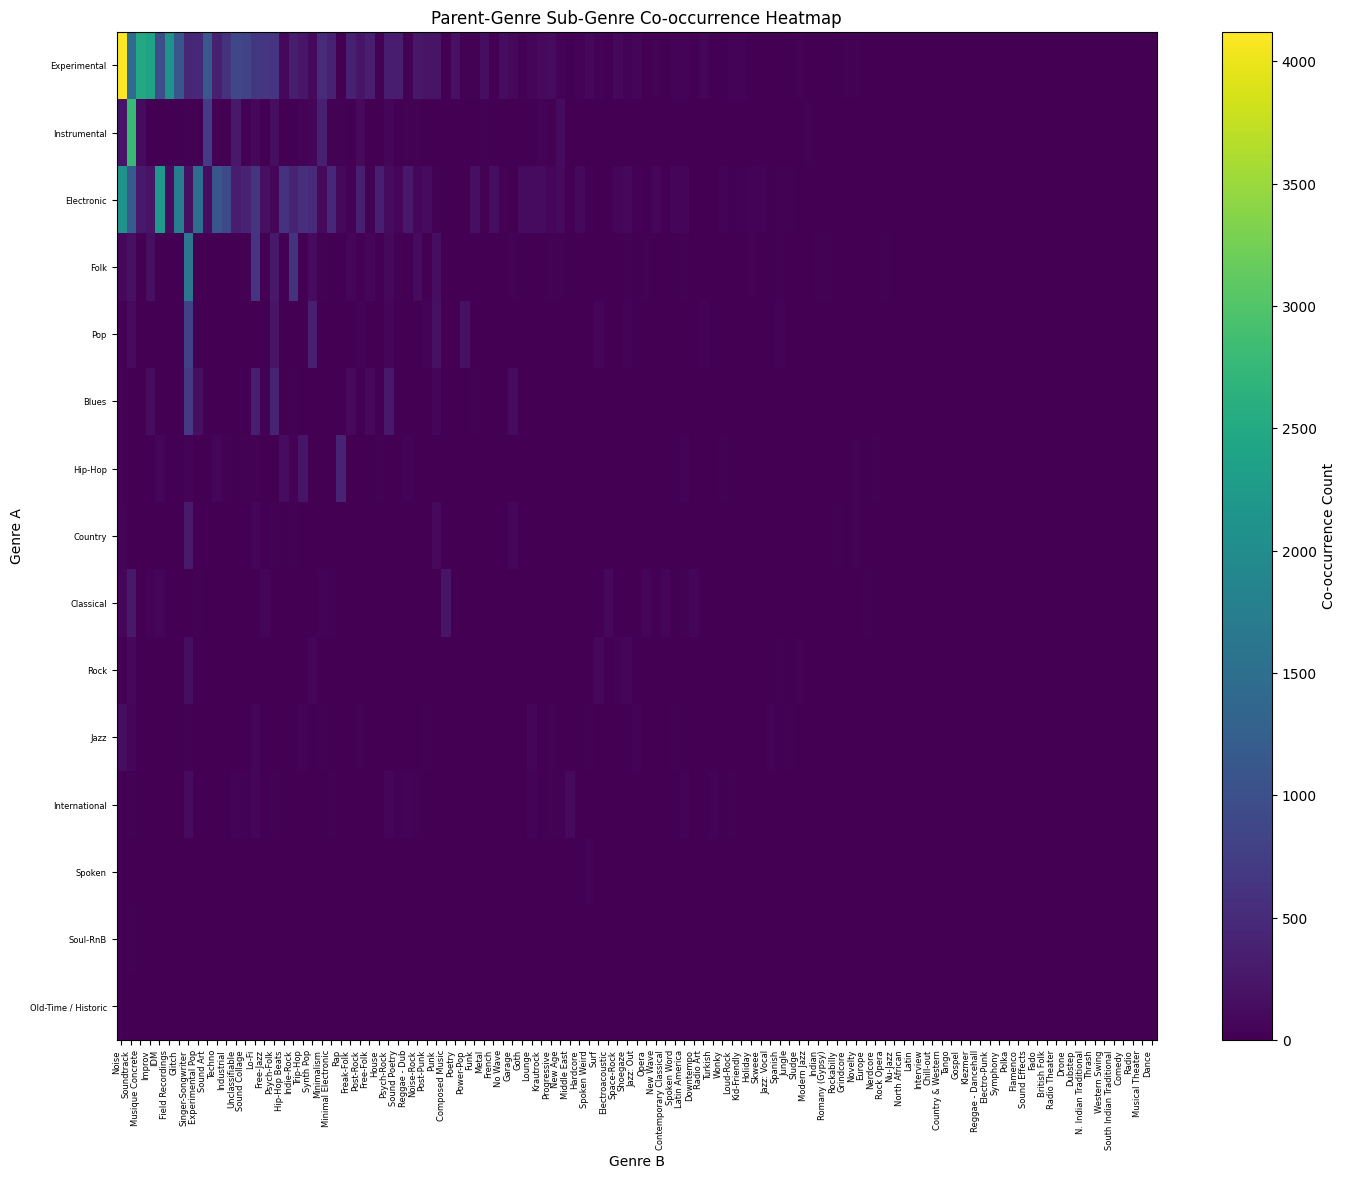

In [121]:
import numpy as np

heatmap_df_filled = heatmap_df.fill_null(0)

genres = heatmap_df_filled["genre"].to_list()
labels_x = heatmap_df_filled.columns[1:]
labels_y = genres

matrix = heatmap_df_filled.select(labels_x).to_numpy()
n = len(labels_x)

fig, ax = plt.subplots(figsize=(20, 16))

cax = ax.imshow(matrix, aspect='auto')
fig.colorbar(cax, label="Co-occurrence Count")

ax.set_xticks(np.arange(n))
ax.set_xticklabels(labels_x, rotation=90, ha='right', fontsize=6)
ax.set_yticks(np.arange(len(labels_y)))
ax.set_yticklabels(labels_y, fontsize=6)

plt.subplots_adjust(bottom=0.25, left=0.25)

ax.set_title("Parent-Genre Sub-Genre Co-occurrence Heatmap")
ax.set_xlabel("Genre B")
ax.set_ylabel("Genre A")

plt.show()

In [122]:
pairs = (
    flat_parent_genres
    .join(
      flat_parent_genres.rename({"genre": "genre_b"}), 
      on="track_id", 
      how="inner"
    )
    .filter(pl.col("genre") < pl.col("genre_b"))
    .select(["genre", "genre_b"])
)
pairs

genre,genre_b
str,str
"""Electronic""","""Experimental"""
"""Electronic""","""Experimental"""
"""Electronic""","""Instrumental"""
"""Electronic""","""Hip-Hop"""
"""Classical""","""Electronic"""
…,…
"""Experimental""","""Hip-Hop"""
"""Electronic""","""Experimental"""
"""Electronic""","""Pop"""


In [123]:
co_occurrence = (
    pairs
    .group_by(["genre", "genre_b"])
    .len()
    .sort("len", descending=True)
)

co_occurrence

genre,genre_b,len
str,str,u32
"""Electronic""","""Experimental""",6771
"""Electronic""","""Instrumental""",1888
"""Experimental""","""Instrumental""",1416
"""Electronic""","""Hip-Hop""",1303
"""Electronic""","""Pop""",1256
…,…,…
"""Soul-RnB""","""Spoken""",1
"""International""","""Soul-RnB""",1
"""Old-Time / Historic""","""Rock""",1


In [124]:
heatmap_df = co_occurrence.pivot(
    values="len", 
    index="genre", 
    on="genre_b"
)

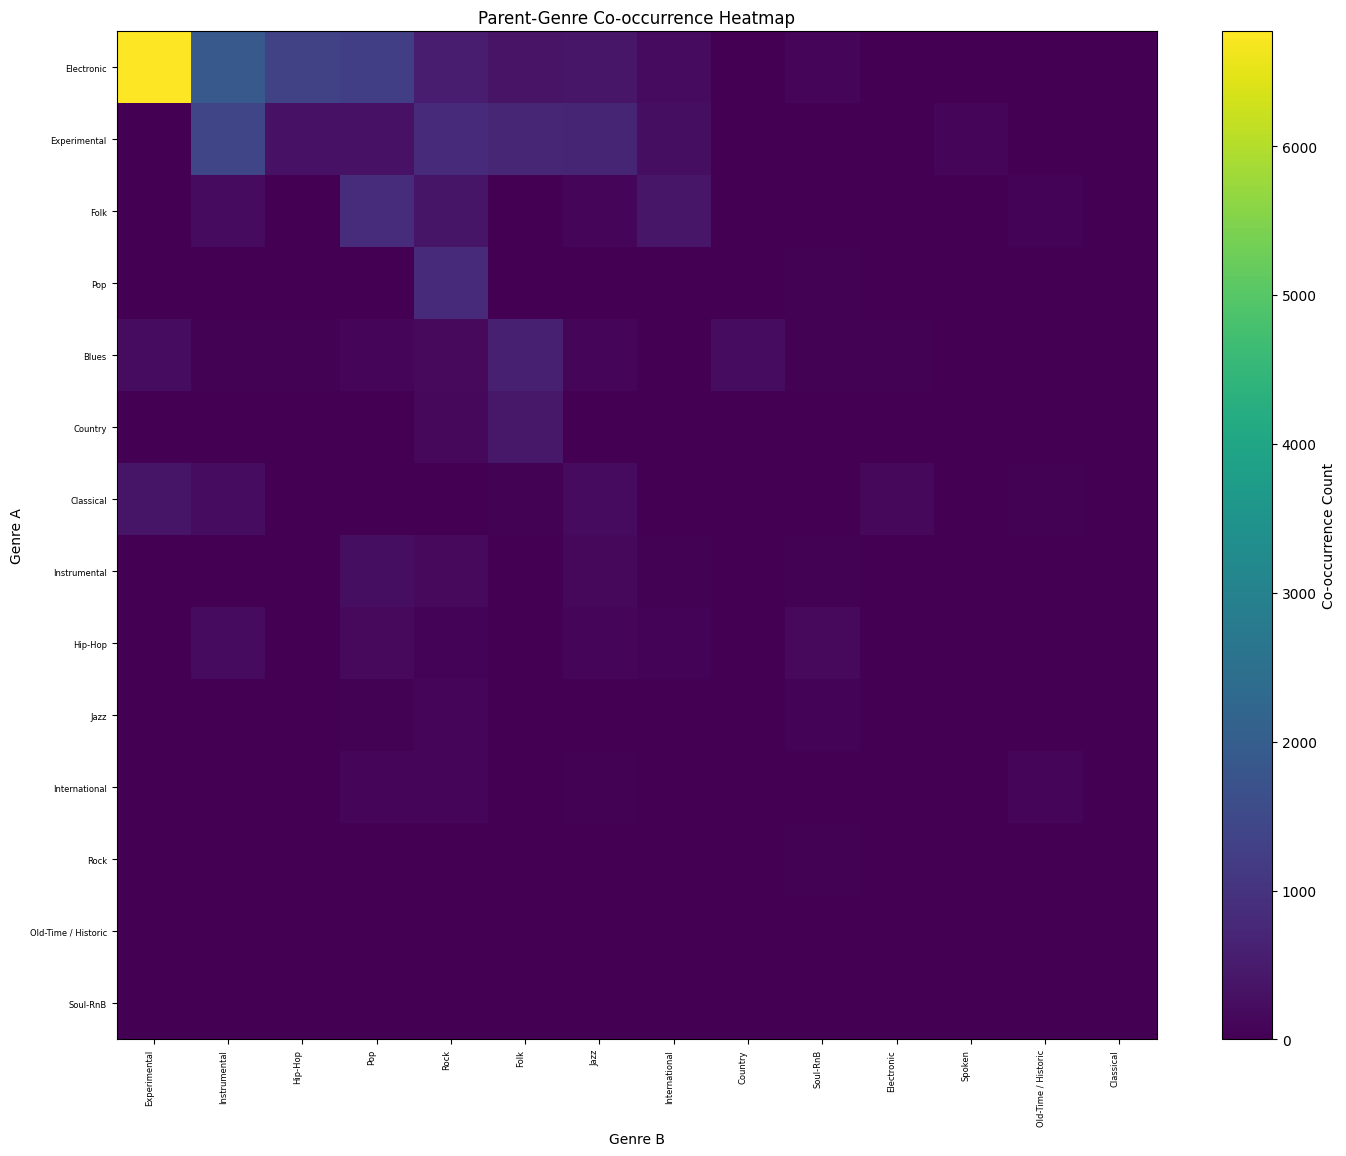

In [125]:
import numpy as np

heatmap_df_filled = heatmap_df.fill_null(0)

genres = heatmap_df_filled["genre"].to_list()
labels_x = heatmap_df_filled.columns[1:]
labels_y = genres

matrix = heatmap_df_filled.select(labels_x).to_numpy()

n = len(labels_x)

fig, ax = plt.subplots(figsize=(20, 16))

cax = ax.imshow(matrix, aspect='auto')
fig.colorbar(cax, label="Co-occurrence Count")

ax.set_xticks(np.arange(n))
ax.set_xticklabels(labels_x, rotation=90, ha='right', fontsize=6)
ax.set_yticks(np.arange(len(labels_y)))
ax.set_yticklabels(labels_y, fontsize=6)

plt.subplots_adjust(bottom=0.25, left=0.25)

ax.set_title("Parent-Genre Co-occurrence Heatmap")
ax.set_xlabel("Genre B")
ax.set_ylabel("Genre A")

plt.show()